In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('../data/AIDS_Classification_50000.csv')

X = df.drop('infected', axis=1)
y = df['infected']


In [4]:
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [6]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,877.369780,1.384800,34.164020,75.861991,0.033480,0.653540,0.132220,96.831560,0.042300,0.640880,...,0.575200,1.936420,0.083460,0.734160,0.342220,319.079540,438.090100,1045.936440,905.938440,0.310120
std,307.288688,1.233272,7.091152,12.028730,0.179888,0.475847,0.338733,5.091788,0.201275,0.479747,...,0.494318,0.895318,0.276579,0.441784,0.474458,102.525976,144.806831,488.617434,339.707976,0.462547
min,66.000000,0.000000,12.000000,42.361620,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,81.000000,96.000000,173.000000,0.000000
25%,542.000000,0.000000,29.000000,68.253682,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,327.000000,713.000000,649.000000,0.000000
50%,1045.000000,1.000000,34.000000,74.054115,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,299.000000,415.000000,885.000000,858.000000,0.000000
75%,1136.000000,3.000000,39.000000,81.142185,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,396.000000,531.000000,1245.000000,1084.000000,1.000000
max,1231.000000,3.000000,68.000000,149.830870,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,930.000000,1119.000000,4656.000000,3538.000000,1.000000


In [9]:
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

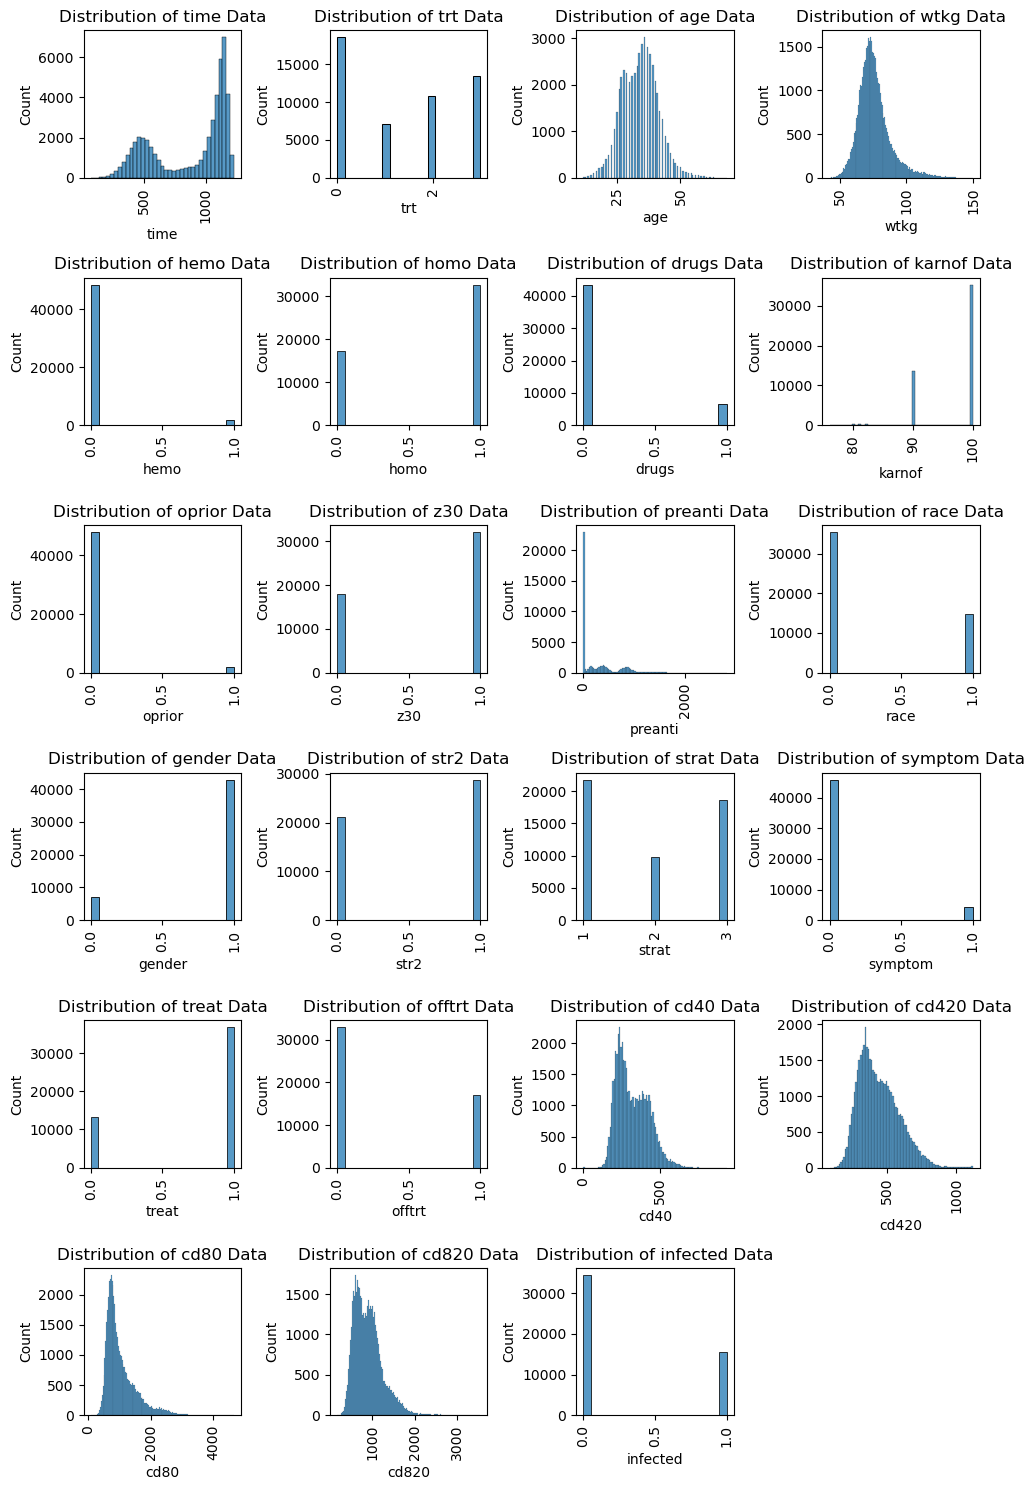

In [8]:
plt.figure(figsize = (10, 15))
for i, col in enumerate(df.columns[:], 1):
    plt.subplot(6, 4, i)
    sns.histplot(x = df[col])
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()

In [19]:
grouped_infect = df.groupby("infected")["infected"].count().reset_index(name="counts")

In [ ]:
#Categorical Variables

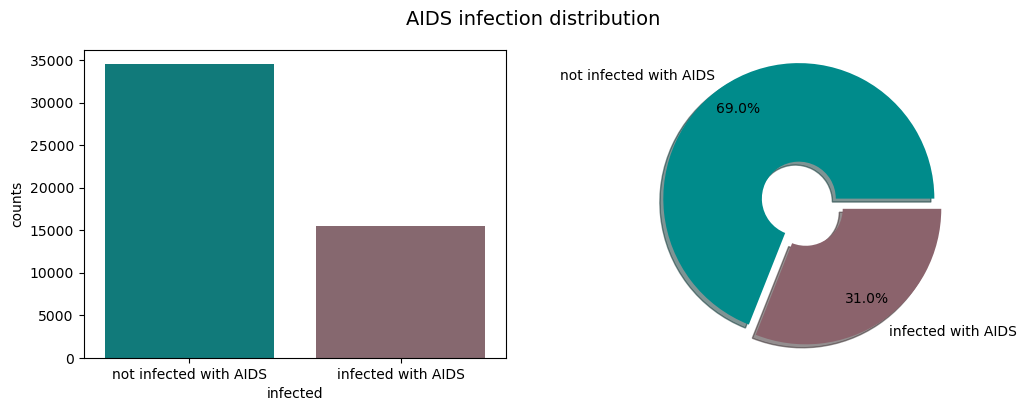

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=grouped_infect.infected, y=grouped_infect.counts, palette=["#008b8b", "#8b636c"])
plt.xticks(ticks=(0,1), labels=["not infected with AIDS", "infected with AIDS"])
plt.subplot(1,2,2)
plt.pie(x=grouped_infect.counts, shadow=True, autopct="%.1f%%", pctdistance=0.8,
        labels=["not infected with AIDS", "infected with AIDS"], colors=["#008b8b", "#8b636c"],
        radius=1.4-0.3, wedgeprops=dict(width=0.8), explode= [0.05,0.05])
plt.suptitle("AIDS infection distribution", fontsize=14)
plt.show()

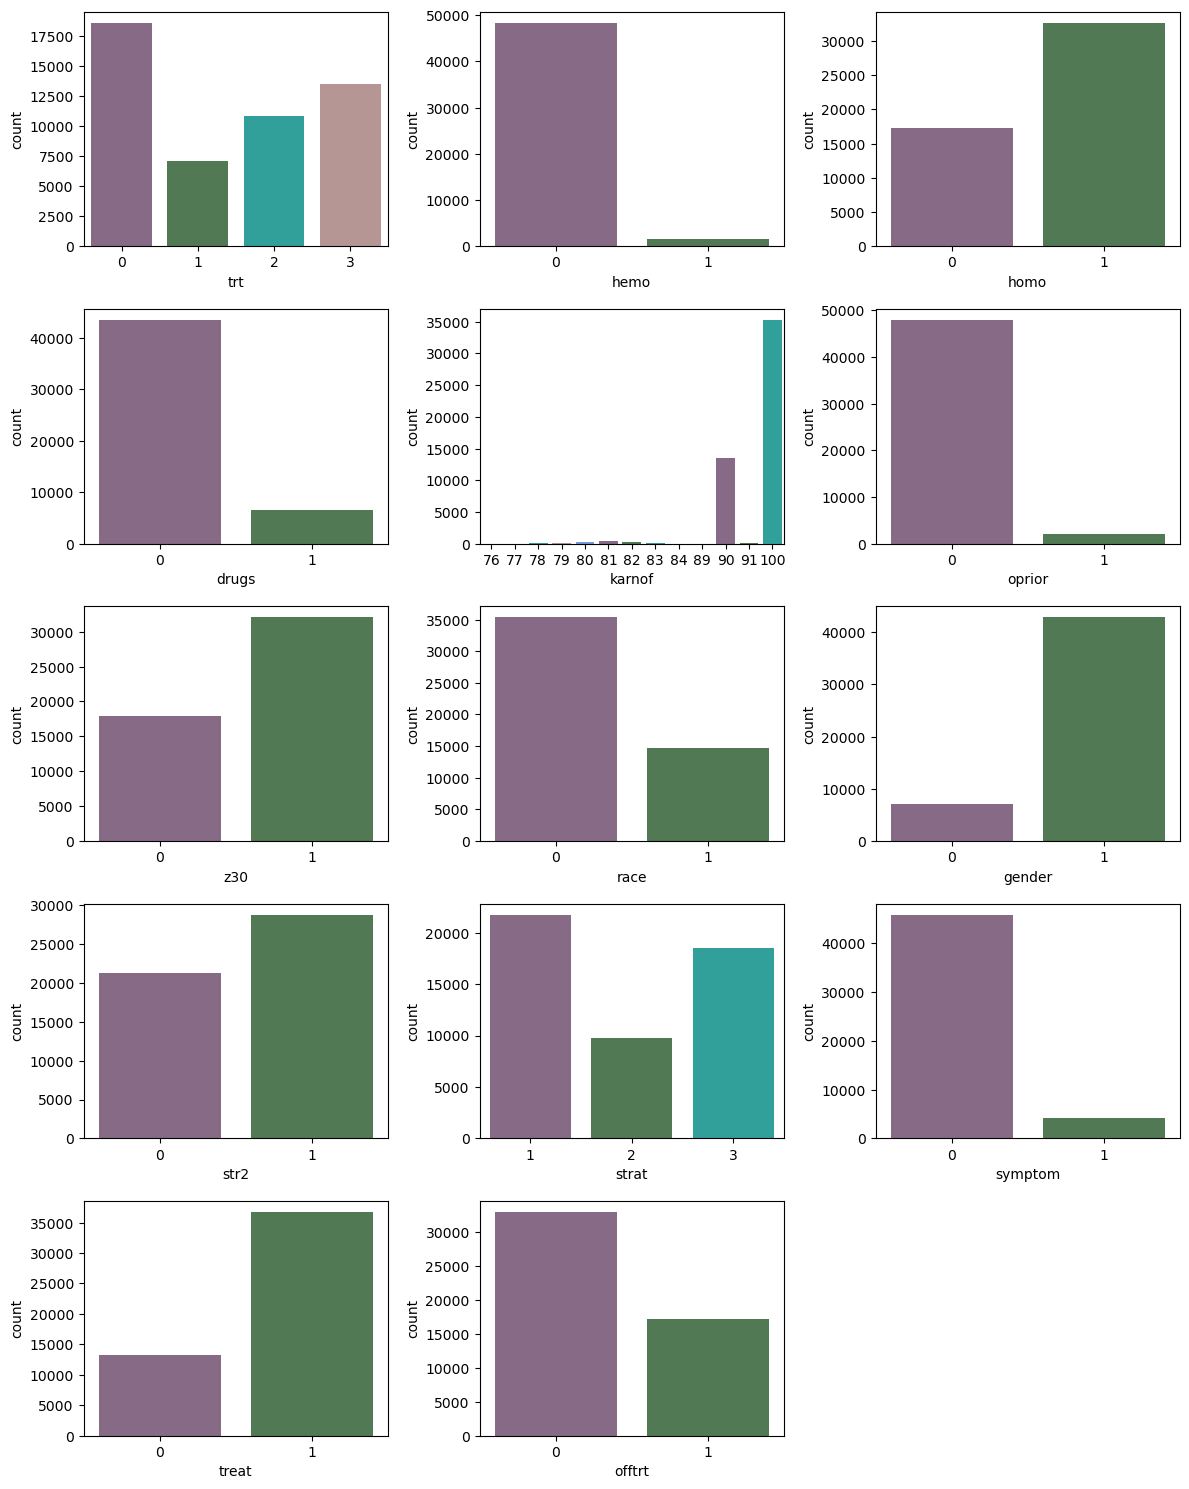

In [21]:
cat_cols = ["trt", "hemo", "homo", "drugs", "karnof", "oprior", "z30",
            "race", "gender", "str2", "strat", "symptom", "treat", "offtrt"]
clr = ["#8b658b", "#4a804d", "#20b2aa", "#bc8f8f", "#6495ed"]
plt.figure(figsize=(12,15))

for i, col in enumerate(cat_cols):
    plt.subplot(5,3, i+1)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), palette=clr)
plt.tight_layout()
plt.show()

In [ ]:
#when infected is 1

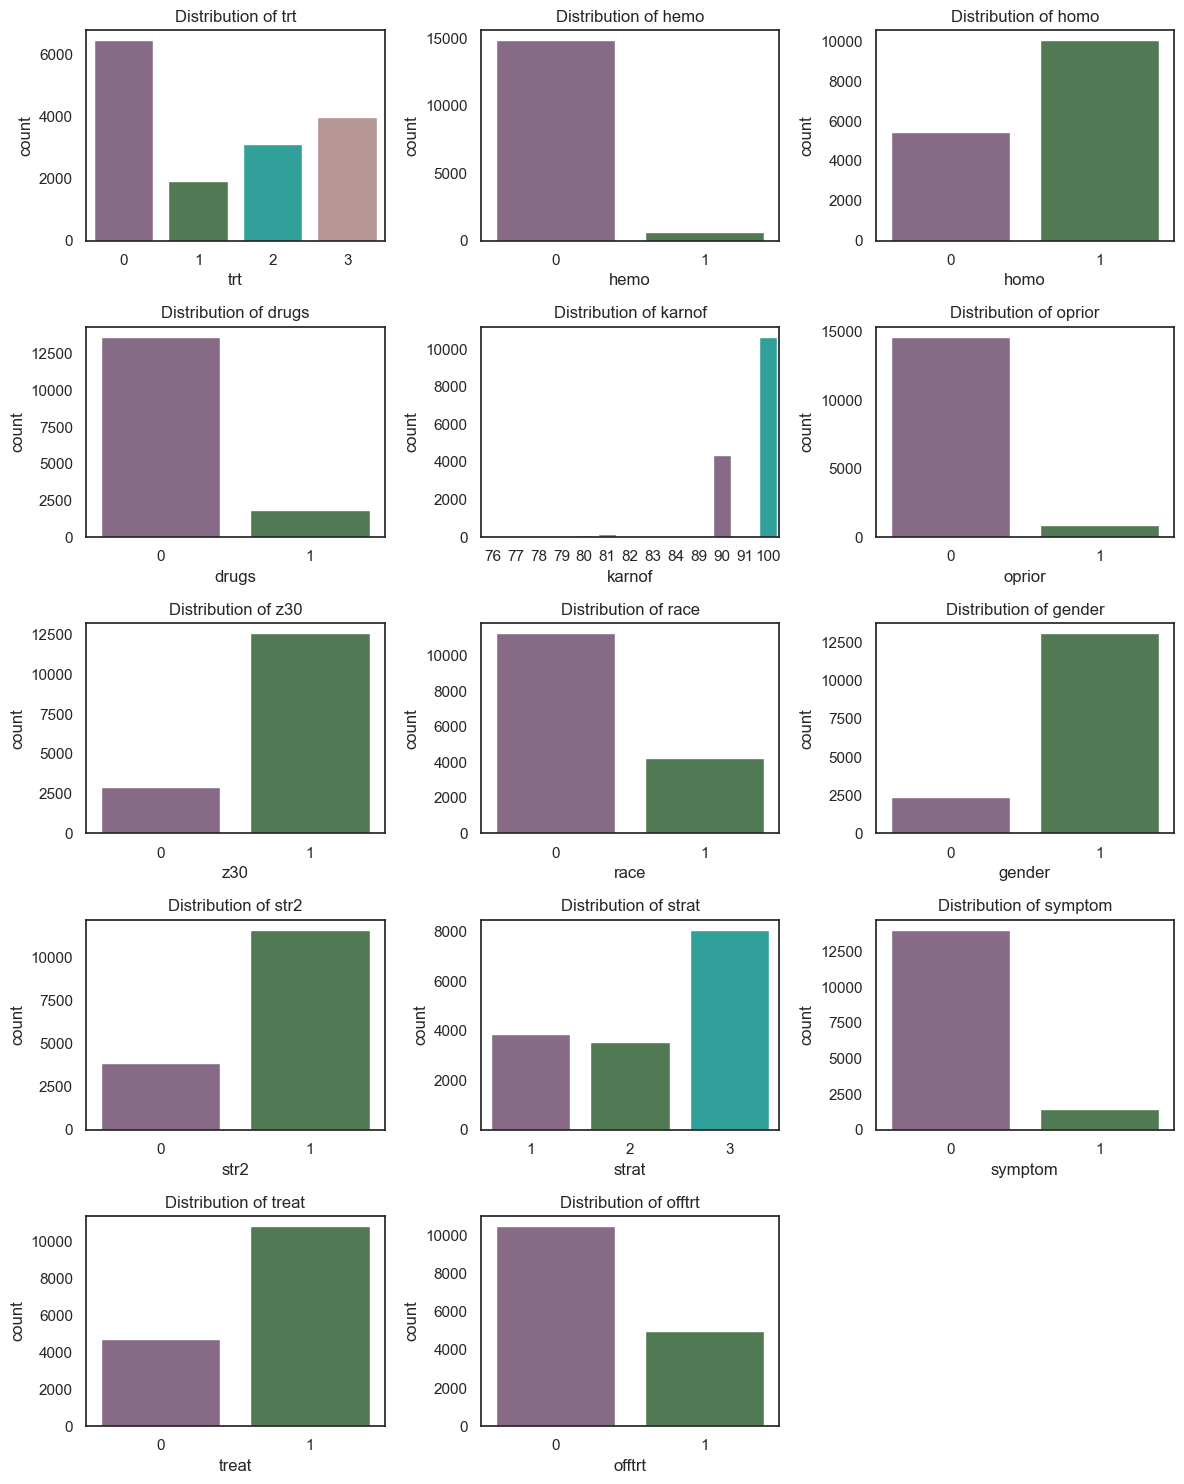

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_infected = df[df['infected'] == 1]


cat_cols = ["trt", "hemo", "homo", "drugs", "karnof", "oprior", "z30",
            "race", "gender", "str2", "strat", "symptom", "treat", "offtrt"]
clr = ["#8b658b", "#4a804d", "#20b2aa", "#bc8f8f", "#6495ed"]

plt.figure(figsize=(12, 15))

for i, col in enumerate(cat_cols):
    plt.subplot(5, 3, i + 1)
    sns.barplot(x=df_infected[col].value_counts().index, y=df_infected[col].value_counts(), palette=clr)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [ ]:
#Numerical Variables

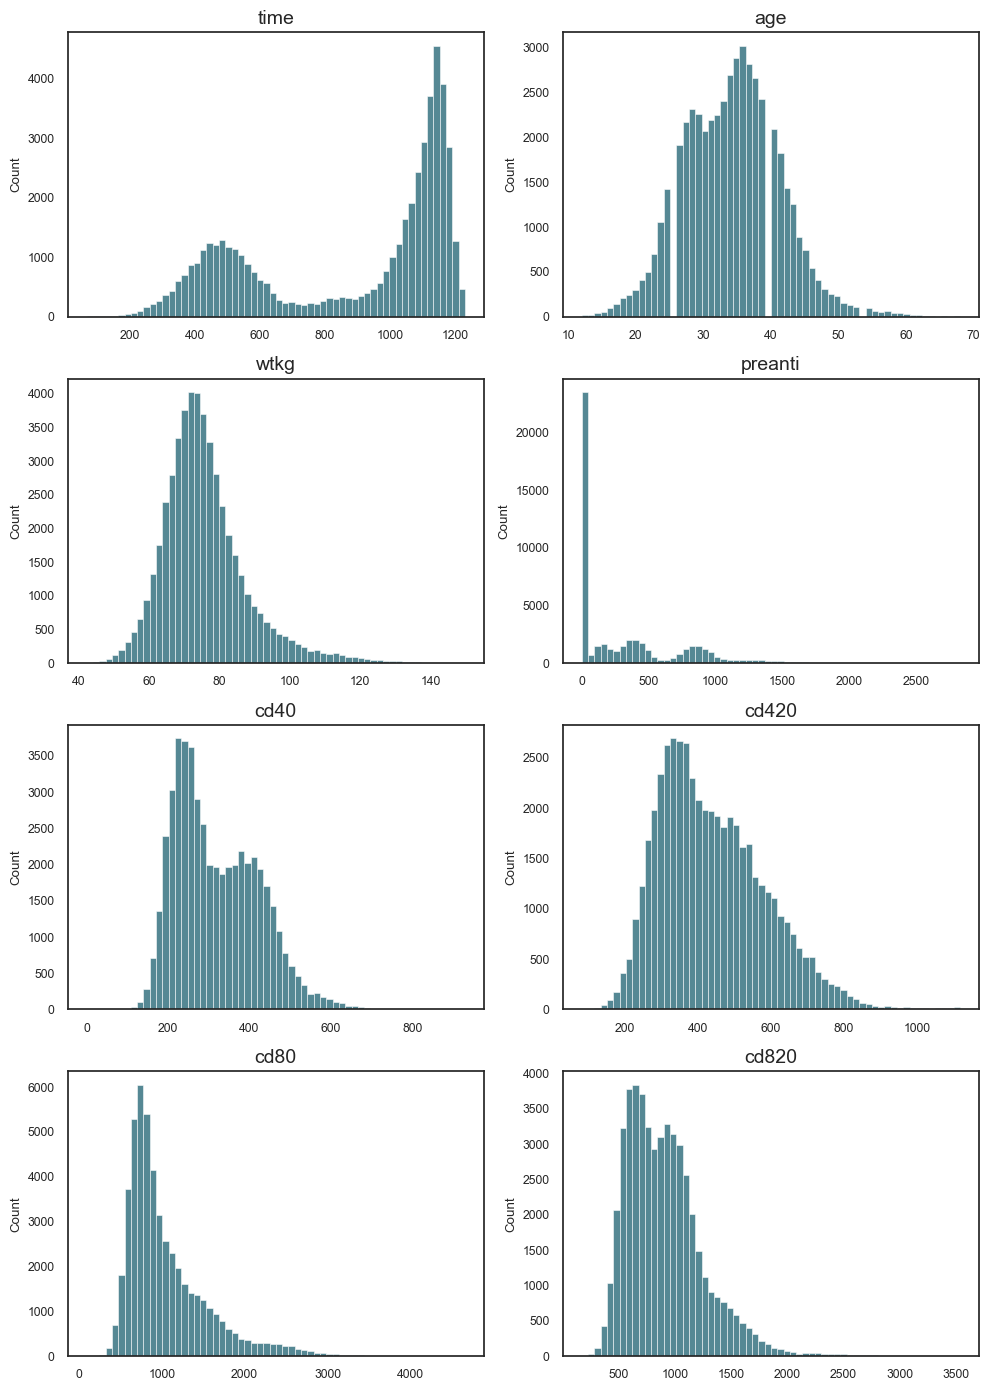

In [22]:
num_cols = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

sns.set(font_scale=0.8)
sns.set_style("white")
plt.figure(figsize=(10,14))
for i, col in enumerate(num_cols):
    plt.subplot(4,2, i+1)
    sns.histplot(df[col], bins=60, color="#1c6071")
    plt.xlabel("")
    plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#when infected is 1

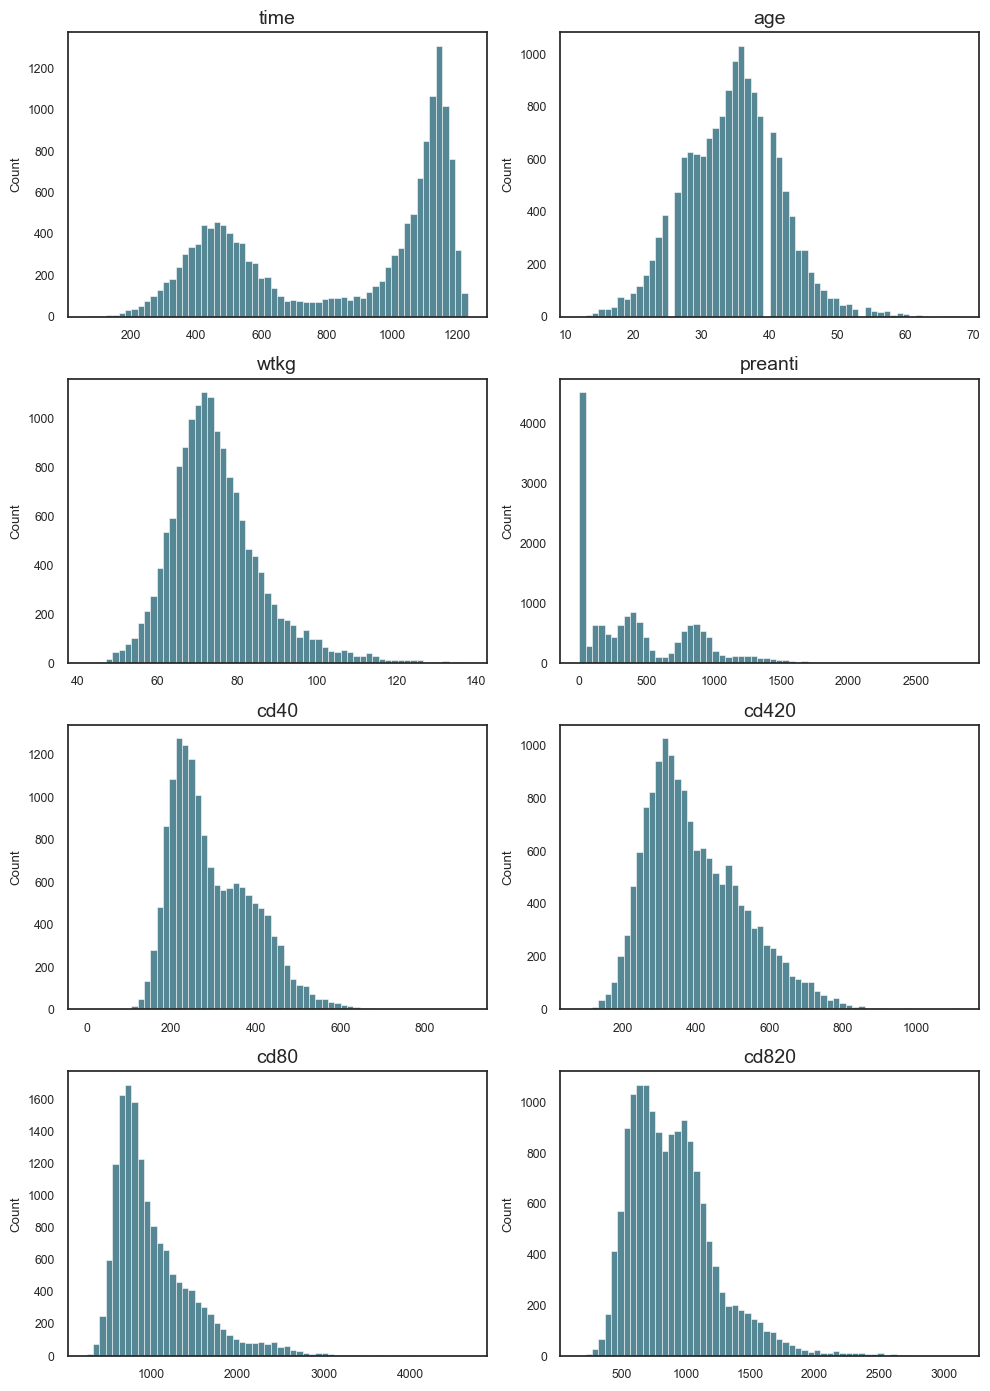

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_infected = df[df['infected'] == 1]

num_cols = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

sns.set(font_scale=0.8)
sns.set_style("white")

plt.figure(figsize=(10, 14))

for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df_infected[col], bins=60, color="#1c6071")
    plt.xlabel("")
    plt.title(col, fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
#Relationship Between Features

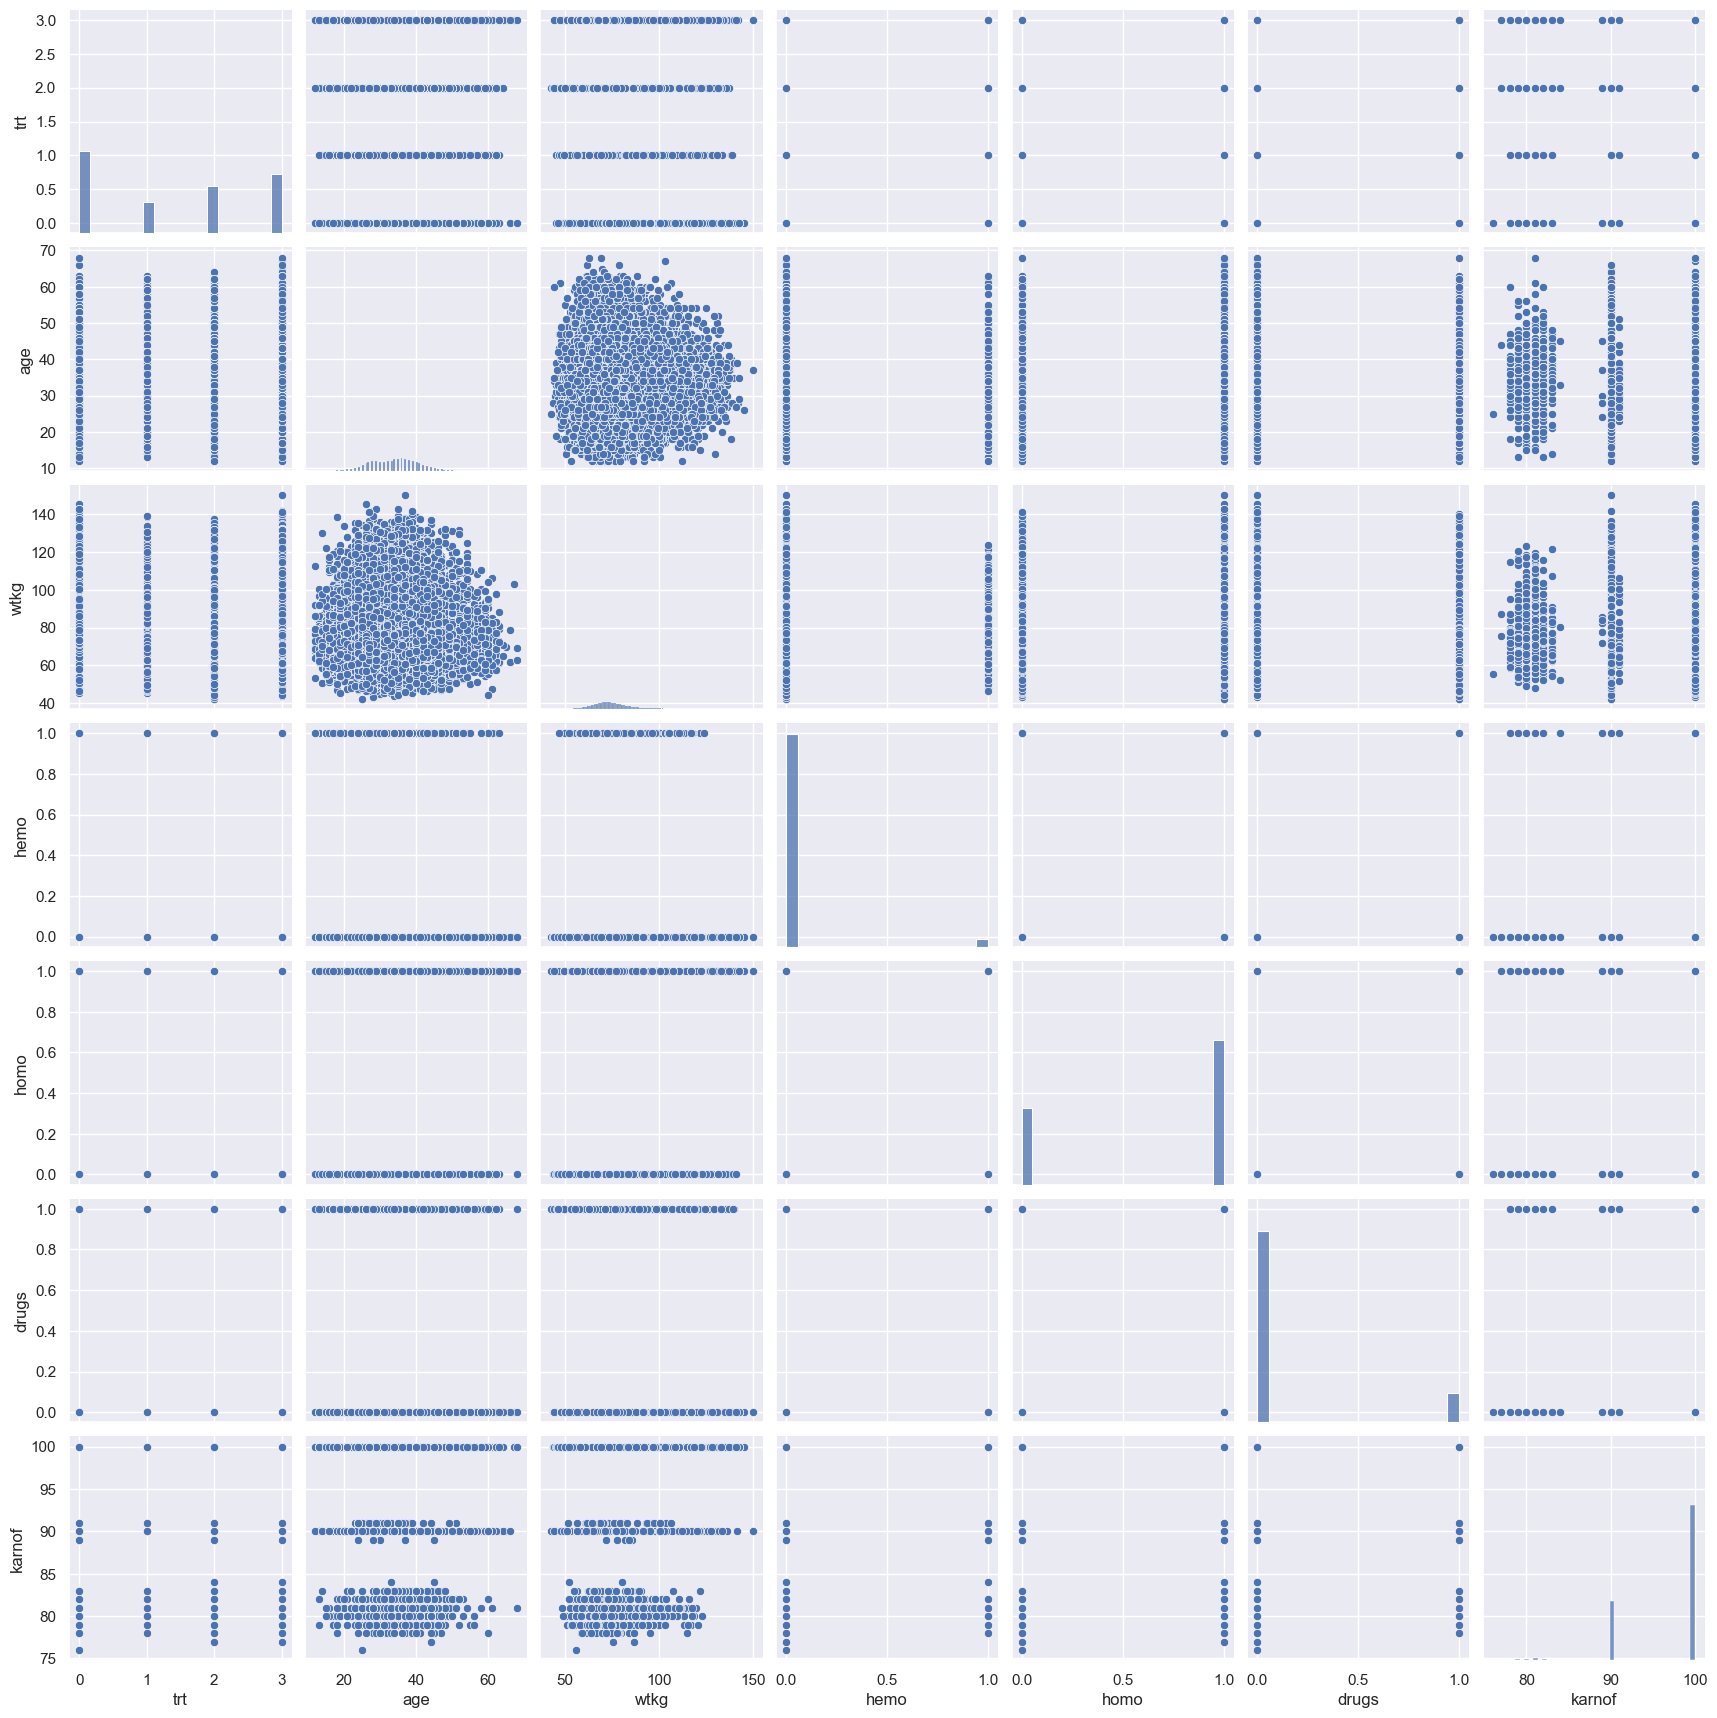

In [23]:
sns.set(font_scale=1)
sns.pairplot(df.iloc[:, 1:8])
plt.show()

In [ ]:
# Relationship of features with AIDS

In [24]:
infect_corr = df.corr()["infected"].drop("infected", axis=0)
infect_corr = infect_corr.sort_values(ascending=False)

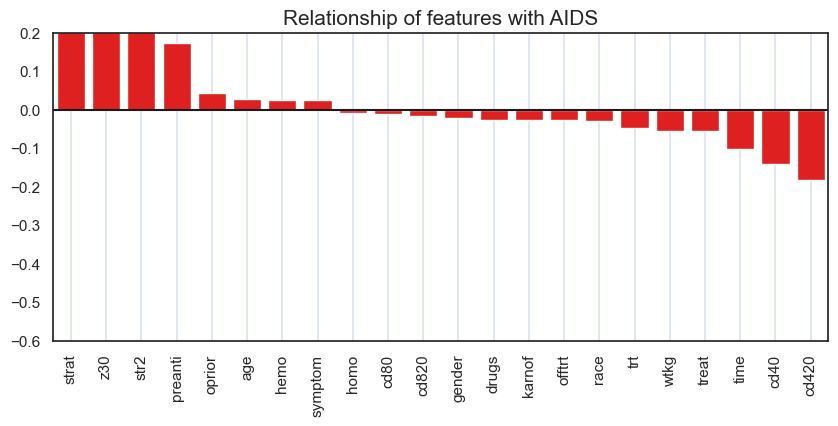

In [25]:
sns.set_style("white")
plt.figure(figsize=(10,4))
sns.barplot(y=infect_corr.values, x=infect_corr.index, color="red")
plt.axhline(0, color="k")
plt.xticks(rotation=90)
plt.grid(visible=True, axis="x", color="b", lw=0.25)
plt.ylim(-0.6, 0.2)
plt.title("Relationship of features with AIDS", fontsize=15)
plt.show()